# Support Vector Machine (SVM) Algorithm
SVC- SV Classification <br>
SVR- SV Regression

- We are going to build a SVM to identify each of a large number of black-and-white rectangular pixel display as <br>one of the 26 capital letters in the English alphabet.The character images were based on 20 different fonts <br>and each letter within these 20 fonts was randomly distorted to produce a file of 20000 unique stimuli. <br>Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts)<br> which were then scaled to fit into a range of integer value.


## Importing libraries and Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'D:\Datasets\14.letterdata.csv')
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [3]:
df.shape

(20000, 17)

## Split Data Into Inputs and Targets

In [4]:
X=np.array(df)[:,1:17]
Y=np.array(df.letter)[:]

In [5]:
X

array([[2, 8, 3, ..., 8, 0, 8],
       [5, 12, 3, ..., 8, 4, 10],
       [4, 11, 6, ..., 7, 3, 9],
       ...,
       [6, 9, 6, ..., 12, 2, 4],
       [2, 3, 4, ..., 9, 5, 8],
       [4, 9, 6, ..., 7, 2, 8]], dtype=object)

In [6]:
Y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

# Train test split

In [7]:
# Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,shuffle=True,test_size=0.2)

## Build SVM Model

In [8]:
from sklearn import svm

model=svm.SVC(C=3)

- C is penalty for wrong classifications. It tells the algorithm how much you care about training points correctly.

In [9]:
model.fit(X_train,Y_train)

SVC(C=3)

## Making Predictions

In [10]:
Y_predict=model.predict(X_test)

In [11]:
Y_predict_df=pd.DataFrame(Y_predict,columns=['Y_predict'])

In [12]:
model.score(X_test,Y_test)

0.9525

In [13]:
Y_grid=np.column_stack([Y_test,Y_predict])

In [14]:
Y_grid

array([['R', 'B'],
       ['H', 'H'],
       ['W', 'W'],
       ...,
       ['P', 'P'],
       ['F', 'F'],
       ['F', 'F']], dtype=object)

In [15]:
import string
lab=list(string.ascii_uppercase[0:26])
plab=['Predicted '+s for s in lab]

- ASCII, abbreviated from American Standard code for Information Interchange, is a character encoding for telecommunication equipment, and other devices.

- ASCII is a 7-bit character set containing 128 characters. It contains the numbers from 0-9,`m

In [16]:
lab

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [17]:
plab

['Predicted A',
 'Predicted B',
 'Predicted C',
 'Predicted D',
 'Predicted E',
 'Predicted F',
 'Predicted G',
 'Predicted H',
 'Predicted I',
 'Predicted J',
 'Predicted K',
 'Predicted L',
 'Predicted M',
 'Predicted N',
 'Predicted O',
 'Predicted P',
 'Predicted Q',
 'Predicted R',
 'Predicted S',
 'Predicted T',
 'Predicted U',
 'Predicted V',
 'Predicted W',
 'Predicted X',
 'Predicted Y',
 'Predicted Z']

In [18]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(Y_test,Y_predict,labels=lab)

df_cm=pd.DataFrame(cm,index=[i for i in lab],columns=[i for i in plab])

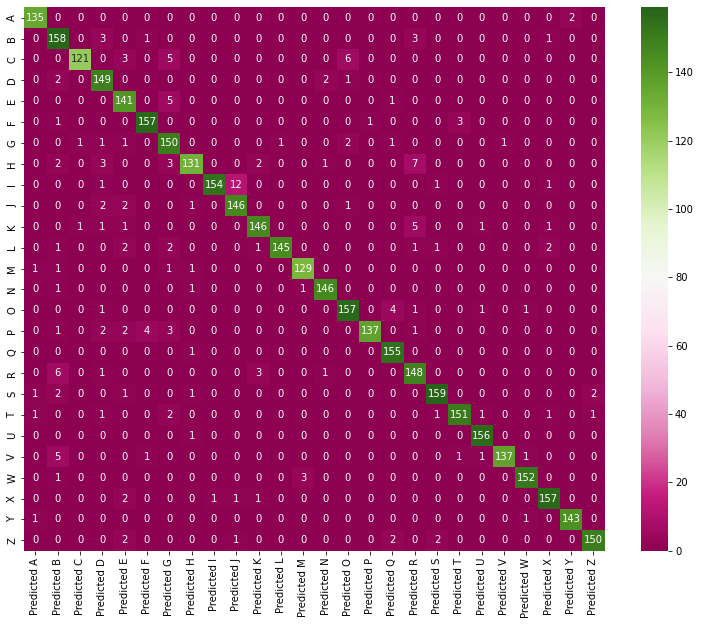

In [19]:
plt.figure(figsize=(13,10))
sns.heatmap(df_cm,annot=True,fmt='g',cmap='PiYG')
plt.show()